<a href="https://colab.research.google.com/github/akashstarxs/tensorflow/blob/master/preprocessod_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tf-nightly
import tensorflow as tf


     |████████████████████████████████| 522.4MB 28kB/s 
     |████████████████████████████████| 3.0MB 37.9MB/s 
     |████████████████████████████████| 460kB 53.7MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 


In [2]:
from tensorflow import keras

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import numpy as np

print(tf.__version__)


2.3.0-dev20200516


In [0]:
(trian_data,test_data),info=tfds.load(
    'imdb_reviews/subwords8k',
    split = (tfds.Split.TRAIN, tfds.Split.TEST),
    as_supervised=True,
    with_info=True)

In [4]:
#imported encoder working
encoder = info.features['text'].encoder
sample_string = 'Hello TensorFlow.'

encoded_string = encoder.encode(sample_string)
print ('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print ('The original string: "{}"'.format(original_string))

assert original_string == sample_string
for ts in encoded_string:
  print ('{} ----> {}'.format(ts, encoder.decode([ts])))



Encoded string is [4025, 222, 6307, 2327, 4043, 2120, 7975]
The original string: "Hello TensorFlow."
4025 ----> Hell
222 ----> o 
6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
7975 ----> .


In [9]:
for train_example, train_label in trian_data.take(1):
  print('Encoded text:', train_example[:10].numpy())
  print('Label:', train_label.numpy())


Encoded text: [  62   18   41  604  927   65    3  644 7968   21]
Label: 0


In [0]:
BUFFER_SIZE=1000


train_batches = (
    trian_data
    .shuffle(BUFFER_SIZE)
    .padded_batch(32, padded_shapes=([None],[])))

test_batches = (
    test_data
    .padded_batch(32, padded_shapes=([None],[])))


In [14]:
model = keras.Sequential([
  keras.layers.Embedding(encoder.vocab_size, 16),
  keras.layers.GlobalAveragePooling1D(),
  keras.layers.Dense(1)])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 130,977
Trainable params: 130,977
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits= True)
              ,metrics=['accuracy'])

In [20]:
history=model.fit(train_batches,
                  epochs=10,
                  validation_data=test_batches,
                  validation_steps=30)

Epoch 1/10
782/782 [==============================] - 8s 10ms/step - loss: 0.6834 - accuracy: 0.5003 - val_loss: 0.6676 - val_accuracy: 0.5042
Epoch 2/10
782/782 [==============================] - 7s 10ms/step - loss: 0.6258 - accuracy: 0.5476 - val_loss: 0.5988 - val_accuracy: 0.6052
Epoch 3/10
782/782 [==============================] - 8s 10ms/step - loss: 0.5463 - accuracy: 0.6582 - val_loss: 0.5375 - val_accuracy: 0.7469
Epoch 4/10
782/782 [==============================] - 8s 11ms/step - loss: 0.4792 - accuracy: 0.7466 - val_loss: 0.4857 - val_accuracy: 0.7448
Epoch 5/10
782/782 [==============================] - 9s 12ms/step - loss: 0.4248 - accuracy: 0.7980 - val_loss: 0.4535 - val_accuracy: 0.8427
Epoch 6/10
782/782 [==============================] - 8s 10ms/step - loss: 0.3848 - accuracy: 0.8324 - val_loss: 0.4205 - val_accuracy: 0.7906
Epoch 7/10
782/782 [==============================] - 8s 10ms/step - loss: 0.3522 - accuracy: 0.8506 - val_loss: 0.3981 - val_accuracy: 0.8406

In [21]:
loss,accuracy=model.evaluate(test_batches)
print(loss)
print(accuracy)

782/782 [==============================] - 3s 4ms/step - loss: 0.3338 - accuracy: 0.8623
0.3338322639465332
0.8623200058937073


In [22]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

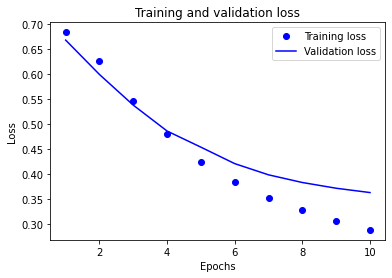

In [23]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

